In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

# Interpolation Hermite avec deux points

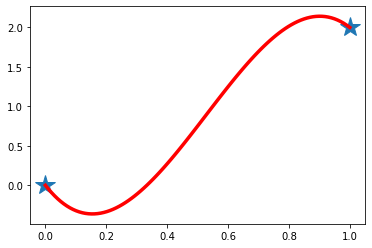

In [6]:
X = [0,1]
Y = [0,2]
alpha0 = -5
alpha1 = -3
plt.plot(X,Y,"*",marker='*',markersize=20.)

A = np.zeros((4,4))
A[0,:]=[1,X[0],X[0]**2,X[0]**3]
A[1,:]=[1,X[1],X[1]**2,X[1]**3]
A[2,:]=[0,1,2*X[0],3*X[0]**2]
A[3,:]=[0,1,2*X[1],3*X[1]**2]

b=np.zeros(4)
b=[Y[0],Y[1],alpha0,alpha1]
Sol = solve(A,b)

def Pn(x): return np.sum([Sol[i]*x**i for i in range(4)])
Vx=np.linspace(0,1,100)
plt.plot(Vx,[Pn(x) for x in Vx],"-r",linewidth=3.5)

# Splines cubique avec 3 points

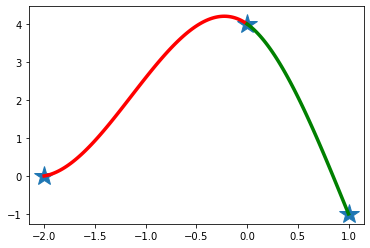

In [5]:
X = [-2, 0, 1]
Y = [ 0, 4, -1]


plt.plot(X,Y,"*",marker='*',markersize=20.)

Mat0 = np.zeros((8,8))
Mat0[0, 0:4] = [1, X[0], X[0]**2, X[0]**3]
Mat0[1, 2:4] = [2, 6*X[0]]
Mat0[2, 0:4] = [1, X[1], X[1]**2, X[1]**3]
Mat0[3, 4:8] = [1, X[1], X[1]**2, X[1]**3]
Mat0[4, 0:8] = [0, 1, 2*X[1], 3*X[1]**2, 0, -1, -2*X[1], -3*X[1]**2]
Mat0[5, 0:8] = [0, 0, 2, 6*X[1], 0, 0, -2, -6*X[1]]
Mat0[6, 4:8] = [1, X[2], X[2]**2, X[2]**3]
Mat0[7, 6:8] = [2, 6*X[2]]

b = np.zeros(8)
b = [Y[0], 7, Y[1], Y[1], 0, 0, Y[2], 0]
Sol = solve(Mat0,b)

def S0(x): return Sol[0] + Sol[1]*x + Sol[2]*x**2 + Sol[3]*x**3
def S1(x): return Sol[4] + Sol[5]*x + Sol[6]*x**2 + Sol[7]*x**3

Vx1 = np.linspace(X[0],X[1],100)
Vx2 = np.linspace(X[1],X[2],100)

plt.plot(Vx1,S0(Vx1),"-r",linewidth=3.5)
plt.plot(Vx2,S1(Vx2),"-g",linewidth=3.5)

# Splines cubiques cas général

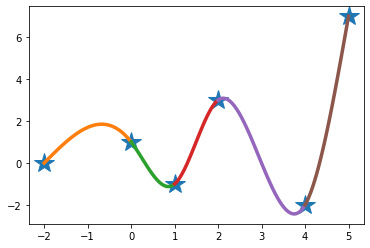

In [9]:
X = [-2, 0, 1, 2, 4, 5]
Y = [ 0, 1, -1, 3, -2, 7]

#X = [-2, -1, 0, 1, 2, 3, 4, 5]
#Y = [0.1, 0.2, 0.5, 1, 0.5, 0.2, 0.1, 0.0588]

Nb=len(X)-1
plt.plot(X,Y,"*",marker='*',markersize=20.)

Mat0 = np.zeros((4*Nb,4*Nb))
b = np.zeros(4*Nb)

Mat0[0,0:4] = [1,X[0],X[0]**2,X[0]**3]
Mat0[1,0:4] = [0,0,2,6*X[0]]
b[0] = Y[0]

for i in range(1,Nb):
    Mat0[4*i-2,4*i-4:4*i+0] = [1,X[i],X[i]**2,X[i]**3]
    Mat0[4*i-1,4*i+0:4*i+4] = [1,X[i],X[i]**2,X[i]**3]
    Mat0[4*i-0,4*i-4:4*i+4] = [0,1,2*X[i],3*X[i]**2,0,-1,-2*X[i],-3*X[i]**2]
    Mat0[4*i+1,4*i-4:4*i+4] = [0,0,2,6*X[i],0,0,-2,-6*X[i]]
    b[4*i-2] = Y[i]
    b[4*i-1] = Y[i]

Mat0[4*Nb-2,4*Nb-4:4*Nb] = [1,X[Nb],X[Nb]**2,X[Nb]**3]
Mat0[4*Nb-1,4*Nb-2:4*Nb] = [2,6*X[Nb]]
b[4*Nb-2] = Y[Nb];


Sol = solve(Mat0,b)

for i in range(0,Nb):
    def S(x): return Sol[4*i+0] + Sol[4*i+1]*x + Sol[4*i+2]*x**2 + Sol[4*i+3]*x**3
    Vx = np.linspace(X[i],X[i+1],100)
    plt.plot(Vx,S(Vx),linewidth=3.5)


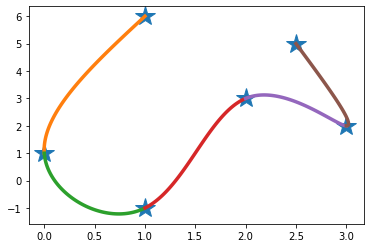

In [8]:
X = [-2, 0, 1, 2, 4, 5]
Y = [ 0, 1, -1, 3, -2, 7]

X = [1, 0, 1, 2, 3, 2.5]
Y = [ 6, 1, -1, 3, 2, 5]

#X = [-2, -1, 0, 1, 2, 3, 4, 5]
#Y = [0.1, 0.2, 0.5, 1, 0.5, 0.2, 0.1, 0.0588]

Nb=len(X)-1
plt.plot(X,Y,"*",marker='*',markersize=20.)

t = np.linspace(0,1,Nb+1)
Mat0 = np.zeros((8*Nb,8*Nb))
b = np.zeros(8*Nb)

Mat0[0,0:4] = [1,t[0],t[0]**2,t[0]**3]
Mat0[1,4:8] = [1,t[0],t[0]**2,t[0]**3]
Mat0[2,0:4] = [0,0,2,6*t[0]]  
Mat0[3,4:8] = [0,0,2,6*t[0]]  
b[0:4] = [X[0],Y[0],0,0]

for i in range(1,Nb):
    b[8*i-4:8*i+4] = [X[i],Y[i],X[i],Y[i],0,0,0,0]
    Mat0[8*i-4,8*(i-1)+0:8*(i-1)+4] = [1,t[i],t[i]**2,t[i]**3]  
    Mat0[8*i-3,8*(i-1)+4:8*(i-1)+8] = [1,t[i],t[i]**2,t[i]**3]
    Mat0[8*i-2,8*(i-1)+8:8*(i-1)+12] = [1,t[i],t[i]**2,t[i]**3]  
    Mat0[8*i-1,8*(i-1)+12:8*(i-1)+16] = [1,t[i],t[i]**2,t[i]**3]
    Mat0[8*i+0,8*(i-1)+0:8*(i-1)+4] = [0,1,2*t[i],3*t[i]**2]    
    Mat0[8*i+0,8*(i-1)+8:8*(i-1)+12] = [0,-1,-2*t[i],-3*t[i]**2]  
    Mat0[8*i+1,8*(i-1)+4:8*(i-1)+8] = [0,1,2*t[i],3*t[i]**2]    
    Mat0[8*i+1,8*(i-1)+12:8*(i-1)+16] = [0,-1,-2*t[i],-3*t[i]**2]  
    Mat0[8*i+2,8*(i-1)+0:8*(i-1)+4] = [0,0,2,6*t[i]]   
    Mat0[8*i+2,8*(i-1)+8:8*(i-1)+12] = [0,0,-2,-6*t[i]]
    Mat0[8*i+3,8*(i-1)+4:8*(i-1)+8] = [0,0,2,6*t[i]]    
    Mat0[8*i+3,8*(i-1)+12:8*(i-1)+16] = [0,0,-2,-6*t[i]]  
    

Mat0[8*Nb-4,8*Nb-8:8*Nb-4] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
Mat0[8*Nb-3,8*Nb-4:8*Nb] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
Mat0[8*Nb-2,8*Nb-8:8*Nb - 4] = [0,0,2,6*t[Nb]]  
Mat0[8*Nb-1,8*Nb-4:8*Nb] = [0,0,2,6*t[Nb]]  
b[8*Nb-4:8*Nb] = [X[Nb],Y[Nb],0,0]


Sol = solve(Mat0,b)

for i in range(0,Nb):
    def S(x): return [Sol[8*i+0] + Sol[8*i+1]*x + Sol[8*i+2]*x**2 + Sol[8*i+3]*x**3,Sol[8*i+4] + Sol[8*i+5]*x + Sol[8*i+6]*x**2 + Sol[8*i+7]*x**3]
    Vx = np.linspace(t[i],t[i+1],100)
    Gamma = S(Vx)
    plt.plot(Gamma[0],Gamma[1],linewidth=3.5)

